- Importing MNIST Dataset
- Initializing Random Noise
- Define Generator Model
- Define discriminator model

In [14]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
!pip install torchsummary
from torchsummary import summary
from torch.optim import Adam
from torch.nn import BCELoss
%pip install -q torch_snippets
from torch_snippets import *
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision.utils import make_grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.6/87.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.8 MB/s eta 0:00:00


In [15]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [16]:
#@ Loading MNSIT Dataset:

transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))
])

dl=DataLoader(MNIST('~/data', train=True, download=True, transform=transform), batch_size=128, shuffle=True, drop_last=True)

In [30]:
#@ Discriminator model:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(784, 1024),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),
        nn.Linear(1024, 512),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),
        nn.Linear(512, 256),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x)

In [31]:
discriminator=Discriminator().to(device)
summary(discriminator, (1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1024]         803,840
         LeakyReLU-2              [-1, 1, 1024]               0
           Dropout-3              [-1, 1, 1024]               0
            Linear-4               [-1, 1, 512]         524,800
         LeakyReLU-5               [-1, 1, 512]               0
           Dropout-6               [-1, 1, 512]               0
            Linear-7               [-1, 1, 256]         131,328
         LeakyReLU-8               [-1, 1, 256]               0
           Dropout-9               [-1, 1, 256]               0
           Linear-10                 [-1, 1, 1]             257
          Sigmoid-11                 [-1, 1, 1]               0
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

In [32]:
#@ Define Generator Model:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(100, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 1024),
        nn.LeakyReLU(0.2),
        nn.Linear(1024, 784),
        nn.Tanh()
    )

  def forward(self, x):
    return self.model(x)

In [33]:
generator=Generator().to(device)
summary(generator, (1, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]          25,856
         LeakyReLU-2               [-1, 1, 256]               0
            Linear-3               [-1, 1, 512]         131,584
         LeakyReLU-4               [-1, 1, 512]               0
            Linear-5              [-1, 1, 1024]         525,312
         LeakyReLU-6              [-1, 1, 1024]               0
            Linear-7               [-1, 1, 784]         803,600
              Tanh-8               [-1, 1, 784]               0
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 5.67
Estimated Total Size (MB): 5.71
----------------------------------------------------------------


In [34]:
#@ Defining Random Noise:
def noise(size):
  n=torch.randn(size, 100)
  return n.to(device)

In [35]:
#@ Function to train discriminator:
def discriminator_train_step(real_data, fake_data):

  d_optimizer.zero_grad() # reseting the gradient

  #prediction on real data:
  prediction_real=discriminator(real_data)
  error_real=loss(prediction_real, torch.ones(len(real_data), 1).to(device))
  error_real.backward()

  #prediction on fake data:
  prediction_fake=discriminator(fake_data)
  error_fake=loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))
  error_fake.backward()

  d_optimizer.step()

  return error_real + error_fake

In [36]:
def generator_train_step(fake_data):
  g_optimizer.zero_grad()
  prediction =discriminator(fake_data)
  error=loss(prediction, torch.ones(len(real_data), 1).to(device))
  error.backward()
  g_optimizer.step()
  return error

In [37]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)
d_optimizer=torch.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer=torch.optim.Adam(generator.parameters(), lr=0.0002)
loss=nn.BCELoss()

Epoch [1/200] | Avg D Loss: 0.6237 | Avg G Loss: 4.5416
Epoch [2/200] | Avg D Loss: 0.3243 | Avg G Loss: 8.1170
Epoch [3/200] | Avg D Loss: 0.6651 | Avg G Loss: 3.7255
Epoch [4/200] | Avg D Loss: 0.8336 | Avg G Loss: 2.8266
Epoch [5/200] | Avg D Loss: 0.4737 | Avg G Loss: 2.9231
Epoch [6/200] | Avg D Loss: 0.3491 | Avg G Loss: 4.0017
Epoch [7/200] | Avg D Loss: 0.3472 | Avg G Loss: 3.9899
Epoch [8/200] | Avg D Loss: 0.4006 | Avg G Loss: 3.6142
Epoch [9/200] | Avg D Loss: 0.4967 | Avg G Loss: 3.3584
Epoch [10/200] | Avg D Loss: 0.4331 | Avg G Loss: 3.2691
Epoch [11/200] | Avg D Loss: 0.4305 | Avg G Loss: 3.3253
Epoch [12/200] | Avg D Loss: 0.5195 | Avg G Loss: 2.9387
Epoch [13/200] | Avg D Loss: 0.5500 | Avg G Loss: 2.6906
Epoch [14/200] | Avg D Loss: 0.5432 | Avg G Loss: 2.6423
Epoch [15/200] | Avg D Loss: 0.5732 | Avg G Loss: 2.6888
Epoch [16/200] | Avg D Loss: 0.6168 | Avg G Loss: 2.4454
Epoch [17/200] | Avg D Loss: 0.6319 | Avg G Loss: 2.4459
Epoch [18/200] | Avg D Loss: 0.7313 | Av

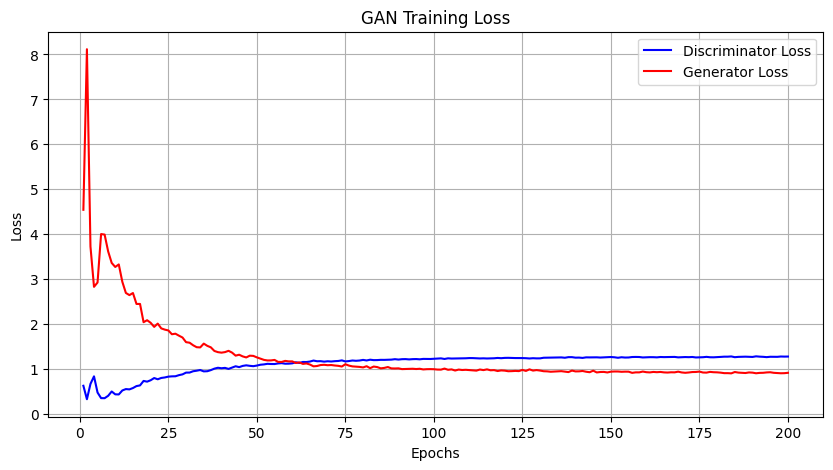

In [38]:
import torch
import matplotlib.pyplot as plt

# Training Parameters
num_epochs = 200
d_losses = []
g_losses = []

for epoch in range(num_epochs):
    N = len(dl)
    total_d_loss = 0
    total_g_loss = 0

    for i, (images, _) in enumerate(dl):
        real_data = images.view(len(images), -1).to(device)

        # Train Discriminator
        fake_data = generator(noise(len(real_data))).to(device).detach()
        d_loss = discriminator_train_step(real_data, fake_data)
        total_d_loss += d_loss.item()

        # Train Generator
        fake_data = generator(noise(len(real_data))).to(device)
        g_loss = generator_train_step(fake_data)
        total_g_loss += g_loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}] | Batch [{i+1}/{N}] | "
              f"D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}", end='\r')

    # Store average losses per epoch
    d_losses.append(total_d_loss / N)
    g_losses.append(total_g_loss / N)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Avg D Loss: {d_losses[-1]:.4f} | Avg G Loss: {g_losses[-1]:.4f}")

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), d_losses, label="Discriminator Loss", color='blue')
plt.plot(range(1, num_epochs + 1), g_losses, label="Generator Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Training Loss")
plt.legend()
plt.grid()
plt.show()


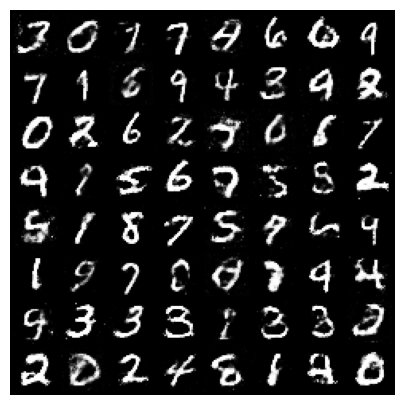

In [39]:
from torchvision.utils import make_grid

z = torch.randn(64, 100).to(device)
sample_images = generator(z).data.cpu().view(64, 1, 28, 28)
grid = make_grid(sample_images, nrow=8, normalize=True)

# Function to display the image
def show(img, sz=5):
    plt.figure(figsize=(sz, sz))
    plt.imshow(img.numpy(), cmap="gray")
    plt.axis("off")
    plt.show()

# Show the generated images
show(grid.cpu().detach().permute(1, 2, 0), sz=5)
